# Train / Test approach

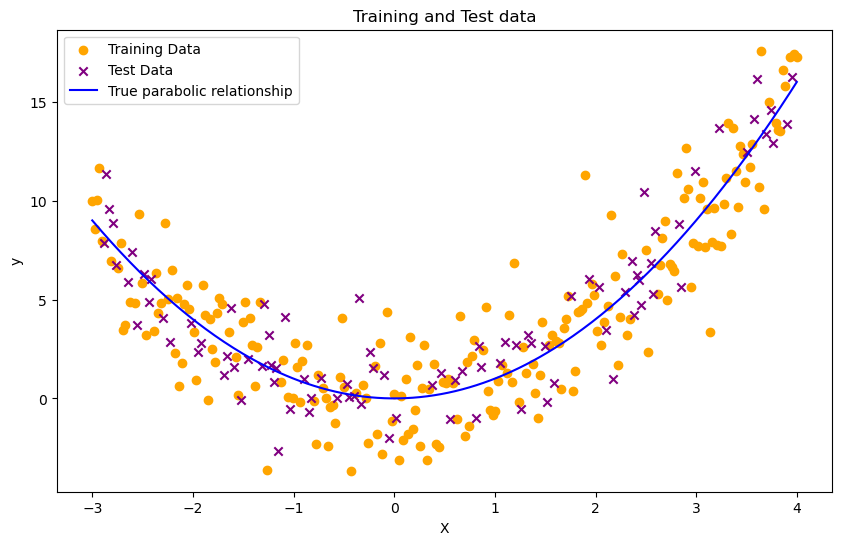

In [357]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Generate dataset
np.random.seed(42)
X = np.linspace(-3, 4, 300).reshape(-1, 1)
y_true = X**2  # True parabolic relationship
y = y_true + np.random.normal(scale=2, size=X.shape)  # Add noise

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Sort the X_test by order 
sorted_indices = np.argsort(X_test.flatten())
X_test_sorted = X_test[sorted_indices]
y_test_sorted = y_test[sorted_indices]

# Sort the X_train by order

sorted_indices = np.argsort(X_train.flatten())
X_train_sorted = X_train[sorted_indices]
y_train_sorted = y_train[sorted_indices]

## Training using Train Set

# Linear Regression Model - Using the train set
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Polynomial Regression (degree=2) - Using the train set
poly_reg = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_reg.fit(X_train, y_train)

# Decision Tree Model - Using the train set
# Hyperparameter Max_depth=None  
tree_reg = DecisionTreeRegressor(max_depth=None)
tree_reg.fit(X_train, y_train)


# Plot results
plt.figure(figsize=(10, 6))

# Plot training data as scatter points
plt.scatter(X_train, y_train, color='orange', label='Training Data')

# Plot training data as scatter points
plt.scatter(X_test, y_test, color='purple', label='Test Data',marker='x')

# Plot 

plt.plot(X,y_true,color="blue",label = "True parabolic relationship")

# Adding labels and legend
plt.xlabel('X')
plt.ylabel('y')
plt.title('Training and Test data')
plt.legend()
plt.show()



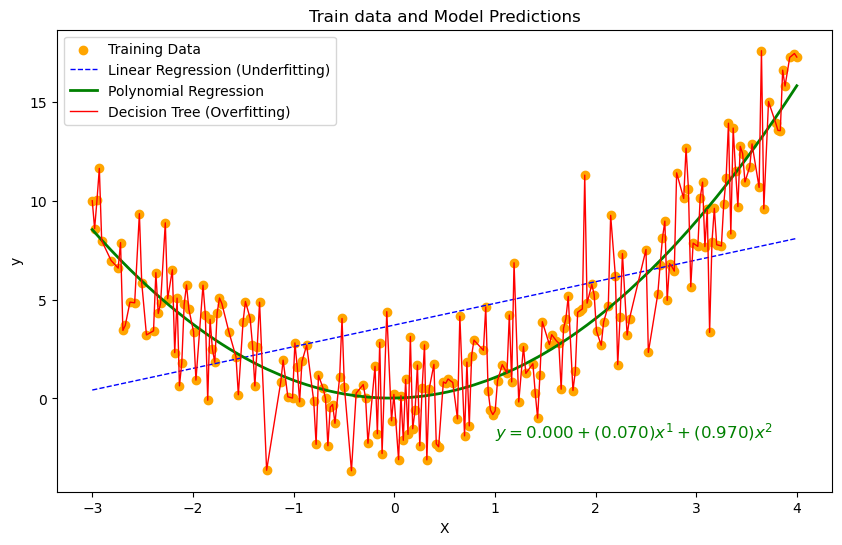

In [358]:
## Model Prediction using Train Set

# Linear Regression Model 
y_pred_lin_train = lin_reg.predict(X_train_sorted)

# Polynomial Regression Model
y_pred_poly_train = poly_reg.predict(X_train_sorted)

# Decision Tree Model
y_pred_tree_train = tree_reg.predict(X_train_sorted)

# Plot results
plt.figure(figsize=(10, 6))

# Plot training data as scatter points
plt.scatter(X_train, y_train, color='orange', label='Training Data')

# Extract coefficients Polynomial Regression Model
poly_coef = poly_reg.named_steps['linearregression'].coef_
poly_formula_latex = f"$y = {poly_coef[0][0]:.3f} + ({poly_coef[0][1]:.3f})x^1 + ({poly_coef[0][2]:.3f})x^2$"

# Plot predictions
plt.plot(X_train_sorted, y_pred_lin_train, label='Linear Regression (Underfitting)', color='blue', linestyle='--', linewidth=1)
plt.plot(X_train_sorted, y_pred_poly_train, label='Polynomial Regression', color='green', linestyle='-', linewidth=2)
plt.plot(X_train_sorted, y_pred_tree_train, label='Decision Tree (Overfitting)', color='red', linestyle='-', linewidth=1)
plt.text(1, -2, poly_formula_latex, fontsize=12, color='green')

# Adding labels and legend
plt.xlabel('X')
plt.ylabel('y')
plt.title('Train data and Model Predictions')
plt.legend()
plt.show()

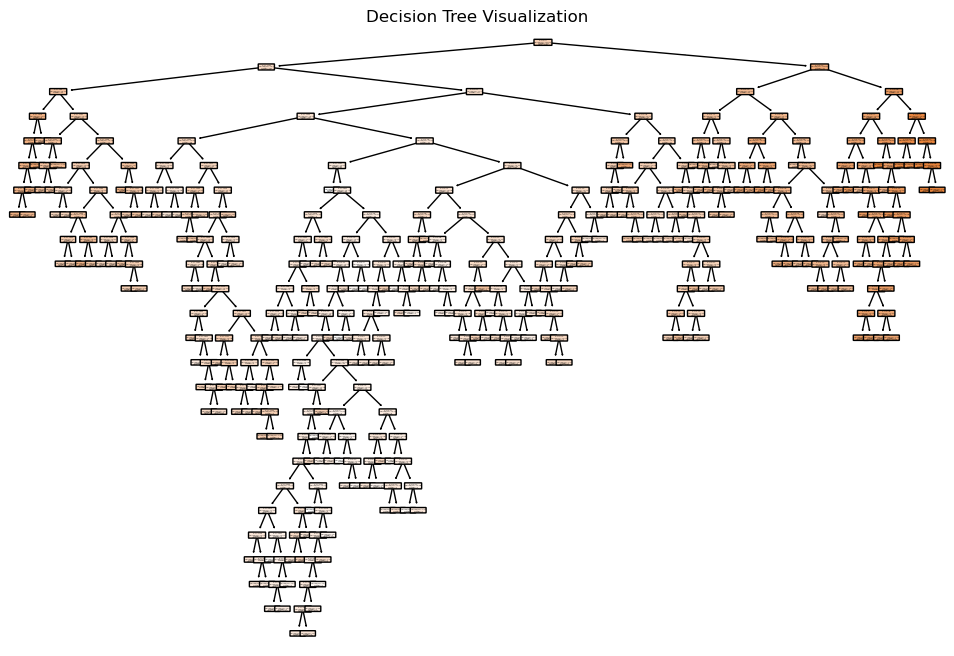

In [359]:
from sklearn.tree import plot_tree
# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree_reg, filled=True, feature_names=['X'], rounded=True, fontsize=1)
plt.title("Decision Tree Visualization")
plt.show()

In [360]:
mse_lin = mean_squared_error(y_train_sorted, y_pred_lin_train)
mse_poly = mean_squared_error(y_train_sorted, y_pred_poly_train)
mse_tree = mean_squared_error(y_train_sorted, y_pred_tree_train)

# DataFrame to display the results in a table format
mse_table = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression (degree=2)', 'Decision Tree'],
    'Mean Squared Error [Train Set]': [mse_lin, mse_poly, mse_tree]
})

# Print the table
mse_table

,Model,Mean Squared Error [Train Set]
0,Linear Regression,17.022021
1,Polynomial Regression (degree=2),4.259998
2,Decision Tree,0.000000


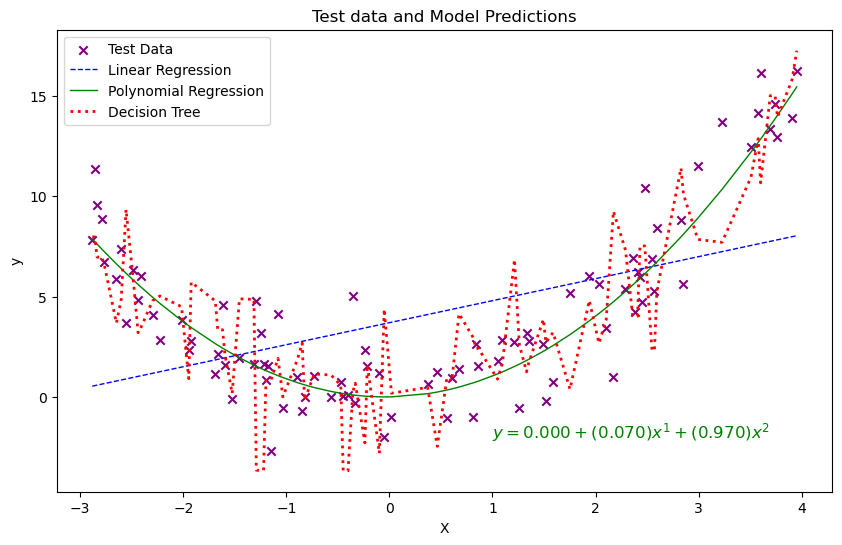

In [361]:
# Linear Regression Model 
y_pred_lin_test = lin_reg.predict(X_test_sorted)

# Polynomial Regression Model
y_pred_poly_test = poly_reg.predict(X_test_sorted)

# Decision Tree Model
y_pred_tree_test = tree_reg.predict(X_test_sorted)

# Plot results
plt.figure(figsize=(10, 6))

# Plot training data as scatter points
plt.scatter(X_test, y_test, color='purple', label='Test Data',marker='x')

# Plot predictions for the continuous range (smooth lines)
plt.plot(X_test_sorted, y_pred_lin_test, label='Linear Regression', color='blue', linestyle='--', linewidth=1)
plt.plot(X_test_sorted, y_pred_poly_test, label='Polynomial Regression', color='green', linestyle='-', linewidth=1)
plt.plot(X_test_sorted, y_pred_tree_test, label='Decision Tree', color='red', linestyle=':', linewidth=2)

plt.text(1, -2, poly_formula_latex, fontsize=12, color='green')

# Adding labels and legend
plt.xlabel('X')
plt.ylabel('y')
plt.title('Test data and Model Predictions')
plt.legend()
plt.show()


In [362]:
mse_lin_test = mean_squared_error(y_test_sorted, y_pred_lin_test)
mse_poly_test = mean_squared_error(y_test_sorted, y_pred_poly_test)
mse_tree_test = mean_squared_error(y_test_sorted, y_pred_tree_test)

In [363]:
mse_table['Mean Squared Error [Test Set]'] = [mse_lin_test, mse_poly_test, mse_tree_test]
mse_table.round(2)

,Model,Mean Squared Error [Train Set],Mean Squared Error [Test Set]
0,Linear Regression,17.02,15.88
1,Polynomial Regression (degree=2),4.26,2.88
2,Decision Tree,0.00,9.12
